<h1><center><font size="6", style="color:#6a5acd;">🎬 IMDB Movie Review Classification 🎬</font></center></h1>

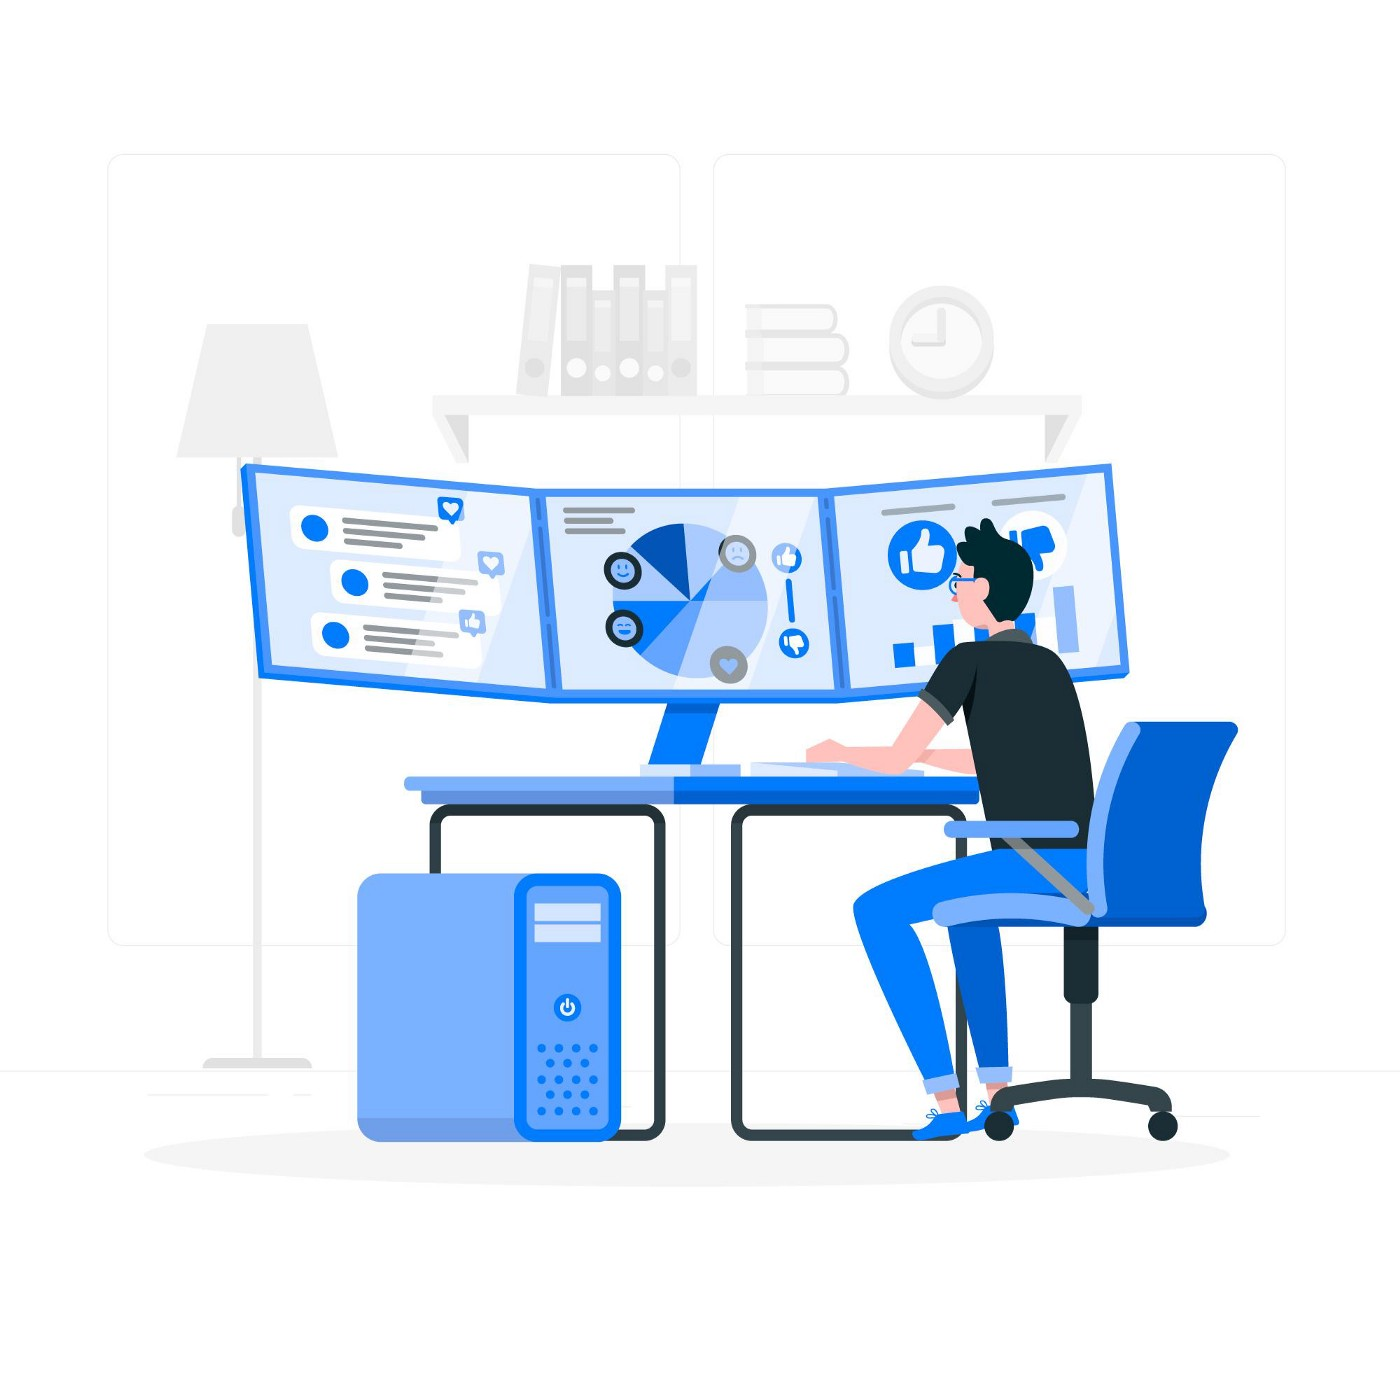

# <a id="0" style="color:#6a5acd;">Table of Content</a>
   
- <a href='#1' style="color:#6a5acd;">Import Libraries</a>  
- <a href='#2' style="color:#6a5acd;">Setting Parameters </a>  
- <a href='#3' style="color:#6a5acd;">Dataset</a>
- <a href='#4' style="color:#6a5acd;">Data Processing</a>
- <a href='#4' style="color:#6a5acd;">CNN Architecture</a>
    - <a href='#41' style="color:#6a5acd;">Embedding() Method</a>
    - <a href='#42' style="color:#6a5acd;">Conv1D() Method</a>
    - <a href='#42' style="color:#6a5acd;">MaxPool1D() Method</a>
- <a href='#5' style="color:#6a5acd;">Defining Several CNN Models with different parameters</a>
- <a href='#6' style="color:#6a5acd;">CNN Model - 1</a>
    - <a href='#61' style="color:#6a5acd;">%%time</a>
    - <a href='#62' style="color:#6a5acd;">legend() Method </a>
- <a href='#7' style="color:#6a5acd;">CNN Model - 2</a>
    - <a href='#71' style="color:#6a5acd;">Reshape() Method </a>
    - <a href='#72' style="color:#6a5acd;">GlobalMaxPool2D() Method</a>
- <a href='#8' style="color:#6a5acd;">CNN Model - 3</a>
    - <a href='#81' style="color:#6a5acd;">Input() Method</a>
    - <a href='#82' style="color:#6a5acd;">concatenate() Method</a>
    - <a href='#83' style="color:#6a5acd;">Dropout() Method</a>
- <a href='#9' style="color:#6a5acd;">CNN Model - 4</a>
- <a href='#10' style="color:#6a5acd;">Conclusions</a>

# <a id="1" style="color:#6a5acd;"> Import Libraries</a> 
[**<span style="color:#FEF1FE;background-color:#6a5acd;border-radius: 5px;padding: 2px">Back to Table of Content</span>**](#0)

In [1]:
import numpy as np
import matplotlib.pyplot as plt

from tensorflow.keras.datasets import imdb
from tensorflow.keras.preprocessing.sequence import pad_sequences

from tensorflow.keras.models import Sequential, Model
from tensorflow.keras.layers import Dense, Dropout, Activation, Conv1D, Reshape, Conv2D, GlobalMaxPool2D, MaxPool1D, Embedding, Flatten, MaxPool2D, concatenate, Input, MaxPooling2D, BatchNormalization
from tensorflow.keras import optimizers

from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

import warnings
warnings.filterwarnings('ignore')

# <a id="2" style="color:#6a5acd;">Setting Parameters</a> 
[**<span style="color:#FEF1FE;background-color:#6a5acd;border-radius: 5px;padding: 2px">Back to Table of Content</span>**](#0)

In [2]:
num_features = 3000
sequence_length = 300
embedding_diemension = 100

# <a id="3" style="color:#6a5acd;"> Dataset</a> 

[**<span style="color:#FEF1FE;background-color:#6a5acd;border-radius: 5px;padding: 2px">Back to Table of Content</span>**](#0)

* From `tensorflow.keras.datasets`, we will import `imdb movie review` data
* We are going to build a model `imdb movie review classification` with `CNN`(convolutional neural network)
* Dataset is split into (Train Features, Train Labels), (Test Features, Test Labels)
* Each review is marked with `0` for a `negative review` or `1` for a `positive review`
* `num_words` Words are ranked by how often they occur (in the training set). num_words most frequent words are kept. Any less frequent word will appear as oov_char value in the sequence data
* Here, `num_words` is set `3000`

In [3]:
(x_train, y_train), (x_test, y_test) = imdb.load_data(num_words = num_features)

17473536/17464789 [==============================] - 0s 0us/step


In [4]:
y_train[:5]

array([1, 0, 0, 1, 0])

# <a id="4" style="color:#6a5acd;"> Data Processing</a> 

[**<span style="color:#FEF1FE;background-color:#6a5acd;border-radius: 5px;padding: 2px">Back to Table of Content</span>**](#0)

**<a id="41" style="color:#6a5acd;">tensorflow.keras.preprocessing.sequence.pad_sequences()</a>**

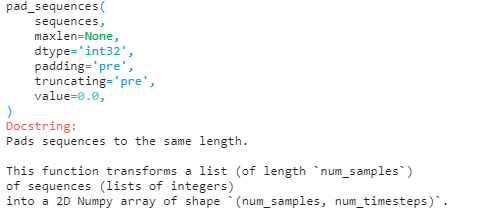

* `num_timesteps` is either the `maxlen` argument if provided,
or the length of the longest sequence in the list

* Sequences that are shorter than `num_timesteps`
are padded with `value` until they are `num_timesteps` long.

* Sequences longer than `num_timesteps` are truncated
so that they fit the desired length.

* The position where padding or truncation happens is determined by
the arguments `padding` and `truncating`, respectively.
* `Pre-padding` or `removing values from the beginning` of the sequence is the
default.

In [5]:
X_train = pad_sequences(x_train, maxlen = sequence_length)
X_test = pad_sequences(x_test, maxlen = sequence_length)

In [6]:
X_train

array([[  0,   0,   0, ...,  19, 178,  32],
       [  0,   0,   0, ...,  16, 145,  95],
       [  0,   0,   0, ...,   7, 129, 113],
       ...,
       [  0,   0,   0, ...,   4,   2,   2],
       [  0,   0,   0, ...,  12,   9,  23],
       [  0,   0,   0, ..., 204, 131,   9]], dtype=int32)

In [7]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(25000, 300)
(25000, 300)
(25000,)
(25000,)


# <a id="4" style="color:#6a5acd;"> CNN Architecture </a> 

[**<span style="color:#FEF1FE;background-color:#6a5acd;border-radius: 5px;padding: 2px">Back to Table of Content</span>**](#0)

* Application of convolutional neural networks is the same as in image data. 
* Only difference, 1D convolutions are applied instead of 2D convolutions. 
* In images, the kernel slides in 2D; but in sequence data like text data the kernel slides in one dimension. 

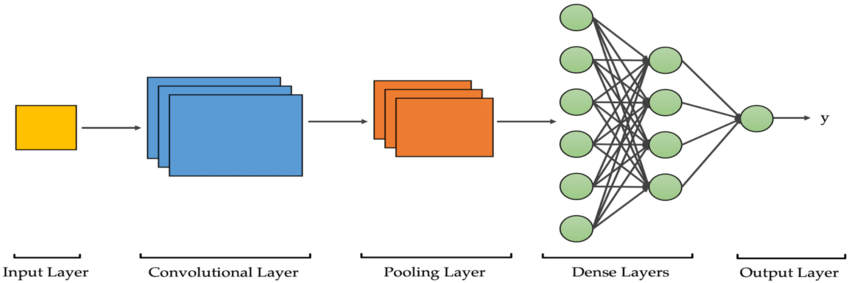

**<a id="41" style="color:#6a5acd;">tensorflow.keras.layers.Embedding()</a>**

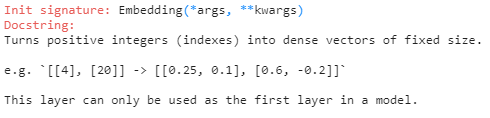

**<a id="42" style="color:#6a5acd;">tensorflow.keras.layers.Conv1D()</a>**

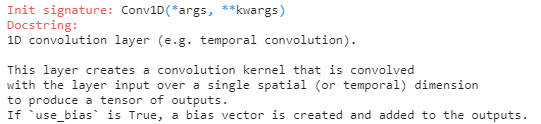

**<a id="43" style="color:#6a5acd;">tensorflow.keras.layers.MaxPool1D()</a>**

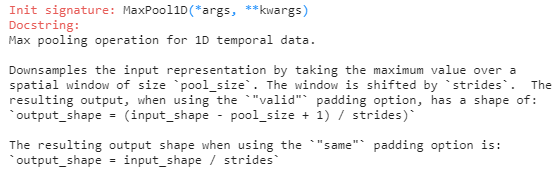

# <a id="5" style="color:#6a5acd;"> Defining Several CNN Models with different parameters </a> 

[**<span style="color:#FEF1FE;background-color:#6a5acd;border-radius: 5px;padding: 2px">Back to Table of Content</span>**](#0)

* Here, we are going to build several `CNN` model with different parameters
* It is done to compare different model's performance
* and finally to obtain the better result, reducing `overfitting`

# <a id="6" style="color:#6a5acd;">CNN Model - 1</a>

[**<span style="color:#FEF1FE;background-color:#6a5acd;border-radius: 5px;padding: 2px">Back to Table of Content</span>**](#0)

**<a id="52" style="color:#6a5acd;">%%time</a>**
* It's a magic command. 
* a part of IPython. 
* prints the `wall time` for the entire cell 

**<a id="53" style="color:#6a5acd;">matplotlib.pyplot.legend()</a>**

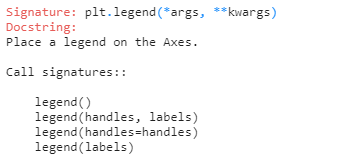

In [8]:
def imdb_cnn():
    model = Sequential()
    
    # use embedding layer to create vector representation of each word => it is fine tuned every iteration
    model.add(Embedding(input_dim = 3000, output_dim = embedding_diemension, input_length = sequence_length))
    model.add(Conv1D(filters = 50, kernel_size = 5, strides = 1, padding = 'valid'))
    model.add(MaxPool1D(2, padding = 'valid'))
    
    model.add(Flatten())
    
    model.add(Dense(10))
    
    model.add(Activation('relu'))
    model.add(Dense(1))
    model.add(Activation('sigmoid'))
    
    adam = optimizers.Adam(learning_rate = 0.001)
    model.compile(loss = 'binary_crossentropy', optimizer = adam, metrics = ['accuracy'])
    
    return model

In [9]:
model = imdb_cnn()

2022-09-30 09:30:13.056205: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-09-30 09:30:13.153672: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-09-30 09:30:13.154544: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-09-30 09:30:13.156095: I tensorflow/core/platform/cpu_feature_guard.cc:142] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 AVX512F FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compil

In [10]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding (Embedding)        (None, 300, 100)          300000    
_________________________________________________________________
conv1d (Conv1D)              (None, 296, 50)           25050     
_________________________________________________________________
max_pooling1d (MaxPooling1D) (None, 148, 50)           0         
_________________________________________________________________
flatten (Flatten)            (None, 7400)              0         
_________________________________________________________________
dense (Dense)                (None, 10)                74010     
_________________________________________________________________
activation (Activation)      (None, 10)                0         
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 1

In [11]:
%%time
history = model.fit(X_train, y_train, batch_size = 50, epochs = 100, validation_split=0.2, verbose = 0)

2022-09-30 09:30:15.669602: I tensorflow/compiler/mlir/mlir_graph_optimization_pass.cc:185] None of the MLIR Optimization Passes are enabled (registered 2)
2022-09-30 09:30:17.283675: I tensorflow/stream_executor/cuda/cuda_dnn.cc:369] Loaded cuDNN version 8005


CPU times: user 2min 35s, sys: 14.2 s, total: 2min 49s
Wall time: 3min 22s


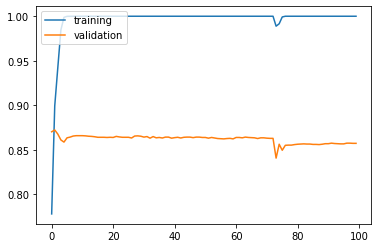

In [12]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.legend(['training', 'validation'], loc='upper left')
plt.show()

In [13]:
results = model.evaluate(X_test, y_test)

782/782 [==============================] - 2s 2ms/step - loss: 1.4427 - accuracy: 0.8565


In [14]:
print('Test Accuracy : ', results[1])

Test Accuracy :  0.8564800024032593


# <a id="7" style="color:#6a5acd;">CNN Model - 2</a>

[**<span style="color:#FEF1FE;background-color:#6a5acd;border-radius: 5px;padding: 2px">Back to Table of Content</span>**](#0)

**<a id="71" style="color:#6a5acd;">tensorflow.keras.layers.Reshape()</a>**

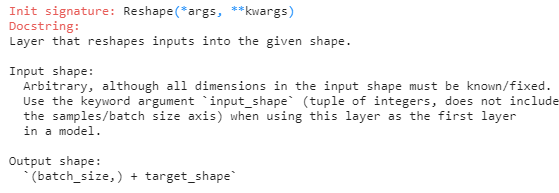

**<a id="72" style="color:#6a5acd;">tensorflow.keras.layers.GlobalMaxPool2D()</a>**

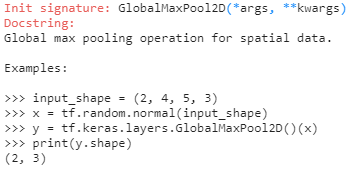

In [15]:
def imdb_cnn_2():
    model = Sequential()
    
    model.add(Embedding(input_dim = 3000, output_dim = embedding_diemension, input_length = sequence_length))
    model.add(Reshape((sequence_length, embedding_diemension, 1), input_shape = (sequence_length, embedding_diemension)))
    model.add(Conv2D(filters = 64, kernel_size = (5, embedding_diemension), strides = (1,1), padding = 'valid'))
    model.add(GlobalMaxPool2D())
    
    model.add(Dense(10))
    model.add(Activation('relu'))
    model.add(Dropout(0.3))
    model.add(Dense(10))
    model.add(Activation('relu'))
    model.add(Dropout(0.3))
    model.add(Dense(1))
    model.add(Activation('sigmoid'))
    
    adam = optimizers.Adam(lr = 0.001)
    
    model.compile(loss='binary_crossentropy', optimizer = adam, metrics=['accuracy'])
    
    return model

In [16]:
model = imdb_cnn_2()

In [17]:
%%time
history = model.fit(X_train, y_train, batch_size = 64, epochs = 100, validation_split=0.2, verbose = 0)

CPU times: user 2min 30s, sys: 13.9 s, total: 2min 44s
Wall time: 2min 22s


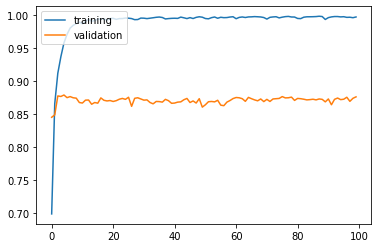

In [18]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.legend(['training', 'validation'], loc = 'upper left')
plt.show()

In [19]:
results = model.evaluate(X_test, y_test)

782/782 [==============================] - 2s 2ms/step - loss: 1.8291 - accuracy: 0.8676


In [20]:
print('Test Accuracy :', results[1])

Test Accuracy : 0.8675600290298462


# <a id="8" style="color:#6a5acd;">CNN Model - 3</a>

[**<span style="color:#FEF1FE;background-color:#6a5acd;border-radius: 5px;padding: 2px">Back to Table of Content</span>**](#0)

**<a id="81" style="color:#6a5acd;">tensorflow.keras.layers.Input()</a>**

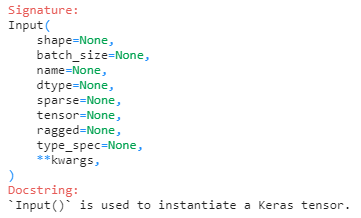

**<a id="82" style="color:#6a5acd;">tensorflow.keras.layers.concatenate()</a>**

* Layer that concatenates a list of inputs.
* It takes as input a list of tensors, all of the same shape except for the concatenation axis, 
* and returns a single tensor that is the concatenation of all inputs

**<a id="83" style="color:#6a5acd;">tensorflow.keras.layers.Dropout()</a>**

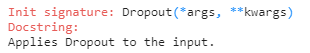

* `Dropout` layer randomly sets input units to 0 with a frequency of `rate`
at each step during training time, which helps prevent overfitting
* Inputs not set to 0 are scaled up by 1/(1 - rate) such that the sum over
all inputs is unchanged
* Dropout layer only applies when `training` is set to True
such that no values are dropped during inference. 
* When using `model.fit`,`training` will be appropriately set to True automatically 
* In other contexts, we can set the kwarg explicitly to True when calling the layer

In [21]:
filter_sizes = [3, 4, 5]

In [22]:
def convolution():
    inn = Input(shape = (sequence_length, embedding_diemension, 1))
    
    convolutions = []
    
    #we will conduct three convoltutions and poolings then concatenate them
    for f in filter_sizes:
        conv = Conv2D(filters = 100, kernel_size = (f, embedding_diemension))(inn)
        non_linearity = Activation('relu')(conv)
        max_pool = MaxPooling2D(pool_size = (sequence_length - f + 1, 1))(non_linearity)
        convolutions.append(max_pool)
    
    out = concatenate(convolutions)
    model = Model(inputs = inn, outputs = out)
    
    return model

In [23]:
def imdb_cnn_3():
    
    model = Sequential()
    model.add(Embedding(input_dim = 3000, output_dim = embedding_diemension, input_length = sequence_length))
    model.add(Reshape((sequence_length, embedding_diemension, 1), input_shape = (sequence_length, embedding_diemension)))
    
    #call defined convolution method
    model.add(convolution())
    model.add(Flatten())
    model.add(Dense(10))
    model.add(Activation('relu'))
    model.add(Dropout(0.3))
    model.add(Dense(10))
    model.add(Activation('relu'))
    model.add(Dropout(0.3))
    model.add(Dense(1))
    model.add(Activation('sigmoid'))
    
    adam = optimizers.Adam()
    
    model.compile(loss = 'binary_crossentropy', optimizer = adam, metrics = ['accuracy'])
    
    return model

In [24]:
model = imdb_cnn_3()

In [25]:
%%time 
model.fit(X_train, y_train, batch_size = 64, epochs = 100, validation_split = 0.2, verbose = 0)

CPU times: user 3min 14s, sys: 19.7 s, total: 3min 34s
Wall time: 6min 2s


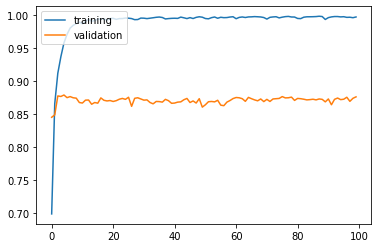

In [26]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.legend(['training', 'validation'], loc='upper left')
plt.show()

In [27]:
results = model.evaluate(X_test, y_test)

782/782 [==============================] - 3s 4ms/step - loss: 1.1428 - accuracy: 0.8715


In [28]:
print("Test Accuracy:", results[1])

Test Accuracy: 0.8715199828147888


# <a id="9" style="color:#6a5acd;">CNN Model - 4</a>

[**<span style="color:#FEF1FE;background-color:#6a5acd;border-radius: 5px;padding: 2px">Back to Table of Content</span>**](#0)

**<a id="91" style="color:#6a5acd;">tensorflow.keras.layers.BatchNormalization()</a>**

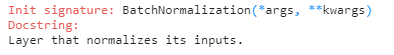

* `Batch Normalization` applies a transformation that maintains the mean output
close to 0 and the output standard deviation close to 1.

* batch normalization works differently during `training` and
during `inference`

* During `training` i.e. when `training=True`, the layer normalizes its output using
the mean and standard deviation of the current batch of inputs

* During `inference` (i.e. when `training=False` (which is the
default), the layer normalizes its output using a moving average of the
mean and standard deviation of the batches it has seen during training

* So, the layer will only normalize its inputs during inference after having been trained on data that has `similar statistics` as the `inference data`

In [29]:
def imdb_cnn_4():
    
    model = Sequential()
    model.add(Embedding(input_dim = 3000, output_dim = embedding_diemension, input_length = sequence_length))
    model.add(Reshape((sequence_length, embedding_diemension, 1), input_shape = (sequence_length, embedding_diemension)))
    model.add(Dropout(0.5))
    #call defined convoltion method
    model.add(convolution())
    
    model.add(Flatten())
    model.add(Dense(10))
    model.add(BatchNormalization())
    model.add(Activation('relu'))
    model.add(Dropout(0.5))
    model.add(Dense(1))
    model.add(Activation('sigmoid'))
    
    adam = optimizers.Adam()
    
    model.compile(loss = 'binary_crossentropy', optimizer = adam, metrics = ['accuracy'])
    
    return model

In [30]:
model = imdb_cnn_4()

In [31]:
%%time
history = model.fit(X_train, y_train, batch_size = 64, epochs = 100, validation_split = 0.2, verbose = 0)

CPU times: user 3min 31s, sys: 20.3 s, total: 3min 52s
Wall time: 6min 22s


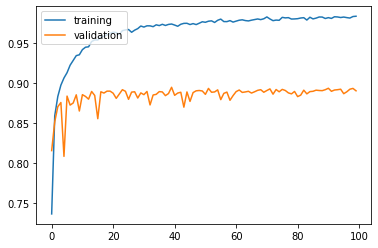

In [32]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.legend(['training', 'validation'], loc = 'upper left')
plt.show()

In [33]:
results = model.evaluate(X_test, y_test)

782/782 [==============================] - 3s 4ms/step - loss: 0.5684 - accuracy: 0.8886


In [34]:
print("Test Accuracy:", results[1])

Test Accuracy: 0.8886399865150452


# <a id="10" style="color:#6a5acd;">Conclusions</a> 

[**<span style="color:#FEF1FE;background-color:#6a5acd;border-radius: 5px;padding: 2px">Back to Table of Content</span>**](#0)

* Gaining some insights, how `Convolutional neural network`(CNN) can be used in context of `NLP` 
* Here,`classification` is performed on `IMDB Movie review` dataset
* CNN can also be implemented for other NLP tasks like machine translation, Sentiment Classification , Relation Classification , Textual Summarization, Answer Selection etc.

## **<center><span style="color:#FEF1FE;background-color:#6a5acd;border-radius: 5px;padding: 5px">Thanks for reading! If you have any feedback or suggestion, I am pleased to hear it:)</span></center>**